# Figure 1

imports

In [1]:
import matplotlib.pyplot as plt
import os
import torch
from utils.funcs import *
os.chdir(r'/')

from boltzmann_machines.RBM import RBM
from boltzmann_machines.RTRBM import RTRBM


In [2]:
create_U_hat(3)

tensor([[ 0., -1.,  1.],
        [ 1.,  0., -1.],
        [-1.,  1.,  0.]])

100%|██████████| 30/30 [00:00<00:00, 58.40it/s]


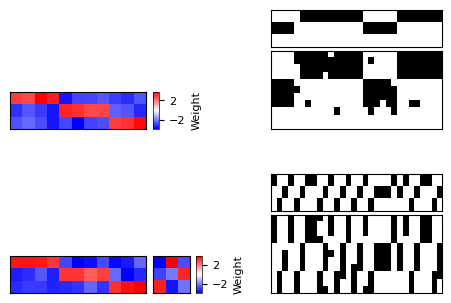

In [16]:
def create_machines():

    n_h, n_v, T = 3, 11, 30

    W = torch.tensor([
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1.2, 1.2, 1.2],
    ], dtype=torch.float)

    U = torch.tensor([
        [-1, 1, -1],
        [-1, -1, 1],
        [1, -1, -1],
    ], dtype=torch.float)

    W[W == 0] = -1
    W *= 3
    U *= 3
    data = torch.zeros(n_v, T, 10)
    rbm = RBM(data, n_hidden=n_h, device='cpu', debug_mode=True)
    rtrbm = RTRBM(data, n_hidden=n_h, device='cpu', debug_mode=True)

    rbm.W = W + .5 * torch.randn(n_h, n_v)
    rtrbm.W = W + .5 * torch.randn(n_h, n_v)
    rtrbm.U = U + .5 * torch.randn(n_h, n_h)
    return rbm, rtrbm


# create data
rbm, rtrbm = create_machines()
v = (torch.rand(rbm.n_visible) < .5).T.type(torch.float)
vs_rbm, hs_rbm = rbm.sample(v_start=v[:, None], pre_gibbs_k=0, gibbs_k=100, chain=30)
vs_rtrbm, hs_rtrbm = rtrbm.sample(v_start=v[:, None], pre_gibbs_k=0, gibbs_k=100, chain=rtrbm.T)

# create figure and grid-spec
fig = plt.figure(figsize=(6.692913379, 3.149606296))
gs = fig.add_gridspec(nrows=7, ncols=11, hspace=0.1, wspace=0.1, left=0.02, right=0.98, top=0.95, bottom=0.05)
fs = 8

# create all axes (save space for illustrations)
W_rbm = fig.add_subplot(gs[2, 4:6])
rbm_cbar = fig.add_subplot(gs[2, 6])
W_rtrbm = fig.add_subplot(gs[6, 4:6])
U_rtrbm = fig.add_subplot(gs[6, 6])
rtrbm_cbar = fig.add_subplot(gs[6, 7])
h_rbm = fig.add_subplot(gs[0, 8:])
v_rbm = fig.add_subplot(gs[1:3, 8:])
h_rtrbm = fig.add_subplot(gs[4, 8:])
v_rtrbm = fig.add_subplot(gs[5:, 8:])
axes = [W_rbm, rbm_cbar, W_rtrbm, U_rtrbm, rtrbm_cbar, h_rbm, v_rbm, h_rtrbm, v_rtrbm]

# turn off all axes ticks
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

# visible-hidden weights rbm
pc = W_rbm.imshow(rbm.W, cmap=plt.get_cmap('bwr'), aspect='equal')
pos = W_rbm.get_position()
new_pos = [pos.x0 - .07, pos.y0 - .01, pos.width + .1, pos.height + .02]
W_rbm.set_position(new_pos)

# visible-hidden weights rtrbm
W_rtrbm.imshow(rtrbm.W, cmap=plt.get_cmap('bwr'), aspect='equal')
pos = W_rtrbm.get_position()
new_pos = [pos.x0 - .07, pos.y0 - .01, pos.width + .1, pos.height + .02]
W_rtrbm.set_position(new_pos)

# hidden-hidden weights rtrbm
U_rtrbm.imshow(rtrbm.U, cmap=plt.get_cmap('bwr'), aspect='equal')
pos = U_rtrbm.get_position()
new_pos = [pos.x0 - .012, pos.y0, pos.width, pos.height]
U_rtrbm.set_position(new_pos)

# rbm weights colorbar
pos = rbm_cbar.get_position()
new_pos = [pos.x0, pos.y0, pos.width / 8, pos.height]
rbm_cbar.set_position(new_pos)
cb = fig.colorbar(pc, rbm_cbar, orientation='vertical')
cb.set_ticks([-2, 2])
cb.set_label('Weight', fontsize=fs)
rbm_cbar.tick_params(labelsize=fs)
cb.outline.set_linewidth(.5)

# rtrbm weights colorbar
pos = rtrbm_cbar.get_position()
new_pos = [pos.x0 - .024, pos.y0, pos.width / 8, pos.height]
rtrbm_cbar.set_position(new_pos)
cb = fig.colorbar(pc, rtrbm_cbar, orientation='vertical')
cb.set_label('Weight', fontsize=fs)
cb.set_ticks([-2, 2])
rtrbm_cbar.tick_params(labelsize=fs)
cb.outline.set_linewidth(.5)

# activities rbm
h_rbm.imshow(hs_rbm, cmap=plt.get_cmap('binary'), aspect='auto')
v_rbm.imshow(vs_rbm, cmap=plt.get_cmap('binary'), aspect='auto')

# activities rtrbm
h_rtrbm.imshow(hs_rtrbm, cmap=plt.get_cmap('binary'), aspect='auto')
v_rtrbm.imshow(vs_rtrbm, cmap=plt.get_cmap('binary'), aspect='auto')

plt.show()